## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [116]:
import warnings
warnings.filterwarnings('ignore')
warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,f1_score,confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('students-data-1.csv', sep = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.shape

(395, 33)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [7]:
df.isna().sum()
# Here there are no missing values in the dataset.

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [13]:
df.index.name = 'number'
df.head()
# Here as asked in question,i have Set the index name of the dataframe to "number"

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [19]:
df.select_dtypes(exclude = 'number').columns
# It displays all columns header which are not numerical

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [38]:
(df.select_dtypes(include = 'number')).var()
# Here we see below that these columns variance < 1 - 
# traveltime,studytime,failures,famrel,freetime,Dalc
# Hence as asked we shall drop these columns whose Variance < 1
# I will store the after drop dataset into 'dt', incase i need origianl data set then i can pull it from 'df'.

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [3]:
dt = df.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'], axis = 1)


In [43]:
dt.shape

(395, 27)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [4]:
le = LabelEncoder()
non_numeric_cols_list = dt.select_dtypes(include = 'object').columns
for i in non_numeric_cols_list:
    print(i) # To know which cols are labelencoded.
    dt[i] = le.fit_transform(dt[i])
dt.head()


school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


In [59]:
dt[non_numeric_cols_list].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [54]:
dt.info()
# Now we can check that all columns are now numeric after converting the categorical columns to numeric
# using LabelEncoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtyp

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [5]:
dt['G1'] = dt['G1'].apply(lambda x: 1 if x>=10 else 0)
dt['G2'] = dt['G2'].apply(lambda x: 1 if x>=10 else 0)
dt['G3'] = dt['G3'].apply(lambda x: 1 if x>=10 else 0)

In [76]:
dt.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,0,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [6]:
X = dt.drop('G3', axis = 1)
y = dt['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [86]:
dt[['G2','G3']].corr()

,G2,G3
G2,1.000000,0.825393
G3,0.825393,1.000000


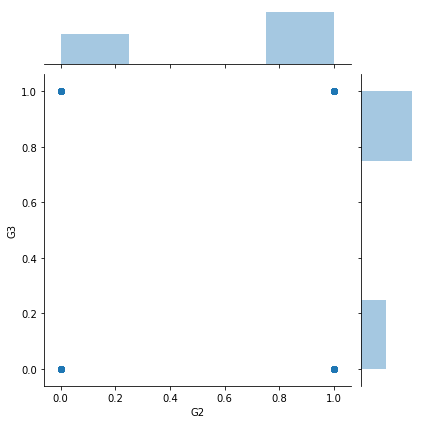

In [108]:
sns.jointplot(dt.G2,dt.G3)
# From correlation matrix and below jointplot and count plots, we can say that there is strong correlation between
# G2 and G3. In Countplot the count of Pass in G2 is almost same as for G3.

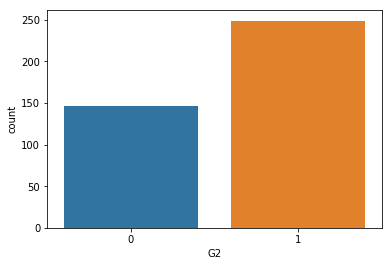

In [92]:
sns.countplot(dt.G2)

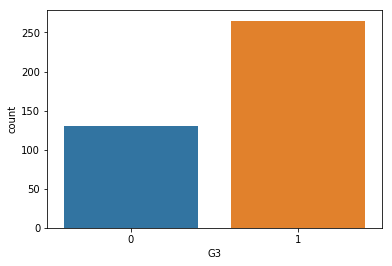

In [93]:
sns.countplot(dt.G3)

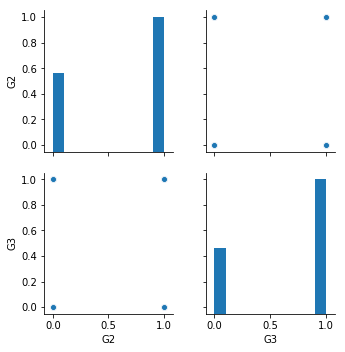

In [84]:
sns.pairplot(dt,vars =['G2','G3'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

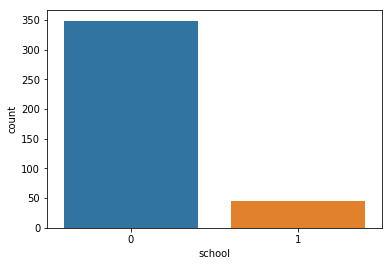

In [109]:
sns.countplot(dt['school'])
#School encoded as 0 i,e. GP has more count of students than 1 encoded school i.e. MS

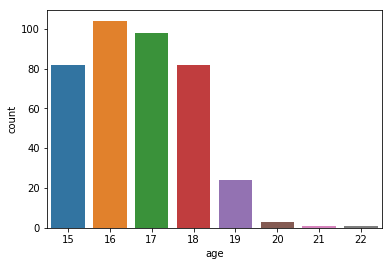

In [112]:
sns.countplot(dt['age'])
# Students of age 16 years are highest. The agewise order for count of students is 16>17>15 = 18>19>20>22>21 

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 300 , random_state = 5)

In [127]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((300, 26), (95, 26), (300,), (95,))

In [128]:
# The number of records for train and test are 300 and 95 respectively.
X_train.shape[0],X_test.shape[0]

(300, 95)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [8]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
Pred_ytrain = lr.predict(X_train)
Pred_ytest = lr.predict(X_test)
print('Train Accuracy Score:',lr.score(X_train,y_train))
print('Test Accuracy Score',lr.score(X_test,y_test))
print('Train F1 Score:',f1_score(y_train,Pred_ytrain))
print('Test F1 Score',f1_score(y_test,Pred_ytest))

Train Accuracy Score: 0.93
Test Accuracy Score 0.8947368421052632
Train F1 Score: 0.9476309226932668
Test F1 Score 0.9166666666666667


In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test,Pred_ytest))
print(metrics.classification_report(y_train,Pred_ytrain))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.95      0.89      0.92        62

   micro avg       0.89      0.89      0.89        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.90      0.89      0.90        95

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        97
           1       0.96      0.94      0.95       203

   micro avg       0.93      0.93      0.93       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.93      0.93       300



# Naive bayes with Iris data

### Import Iris.csv

In [2]:
data = pd.read_csv('iris (3).csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()
# Here we found that there are some Nan values which need to be taken care.
# So we shall replace the nan values with the mean values in that column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data[data.isna() == False]
# We observed that the rows of Id 151, 152 has nan values with Species - Iris-virginica

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data['Species'].value_counts()
# Here we find that no. of records with 2 Species(Target column) are 50 and for class "Iris-virginica" the no of records are 52
# And we saw that 2 records have Nan values for some features in independent Variables.
# So we shall drop those 2 last records. 

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
data = data.drop(index = [150, 151] , axis = 0)
# Now we shall drop Id column also as its of no use for now.

In [12]:
data = data.drop(('Id'), axis = 1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [15]:
X = data.drop('Species', axis =1)
y = data['Species']

### Find the distribution of target variable (Class)

In [17]:
y.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

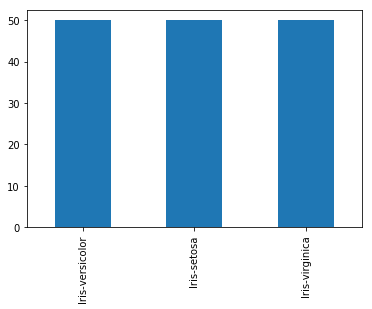

In [36]:
pd.value_counts(data["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

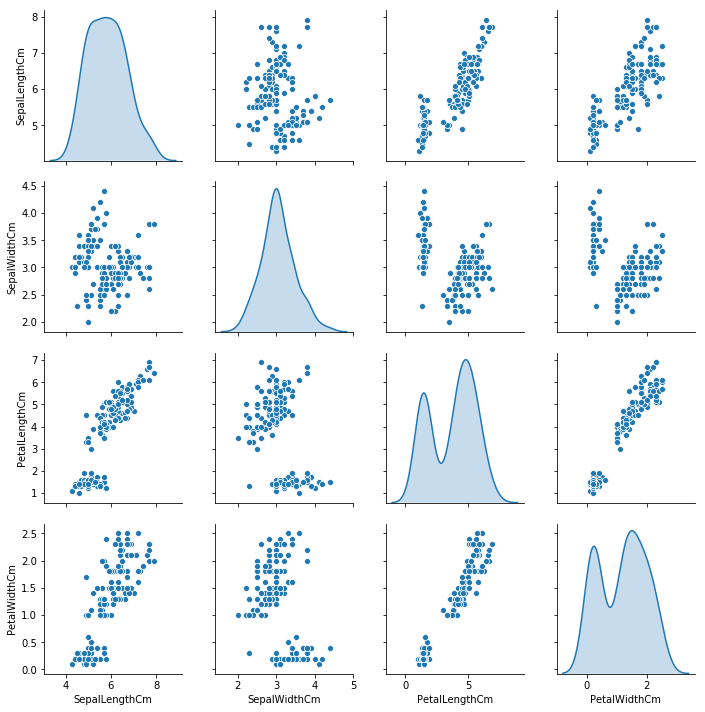

In [44]:
sns.pairplot(data, diag_kind= 'kde')
# Here we find that Sepal Width is normal distibuted. And Sepal Length has sligh skewness abut it is normal distributed.
# Petal Width and Petal Length has 2 peaks/ Gaussians, which mean it is indicating about 2 seperate classes.
# We shall check it in details using "Hue" in pairplot.


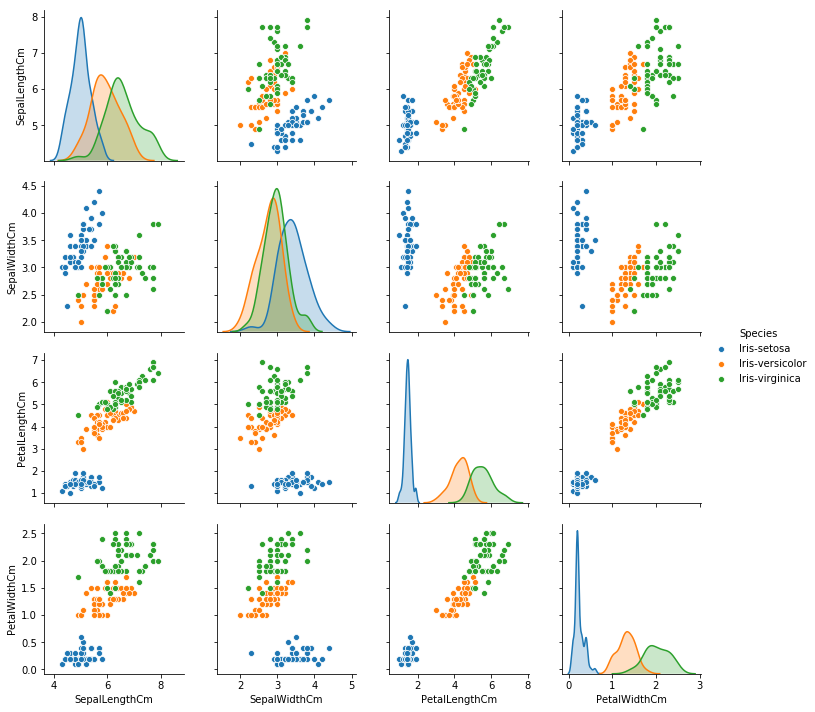

In [45]:
sns.pairplot(data, hue = 'Species')
# Some features in this dataset are easily able to distinguish the dataset into 3 classes of Species.
# This is evident from seperate nonoverlapping peaks for 3 classes for these features- Sepal Length, Petal LEngth, Petal Width

### Summary Statistics and explain insights for at least 2 variables

In [46]:
data.describe()
# SepalLEngth mean and median are almost same, hence we can say its Normal distributed
# SepalWidth mean and median are almost same, hence we can say its Normal distributed
# PetalLEngth median > mean i.e. its is a bit left skewed, and we saw its primarily because of seperate Gaussians for classes
# PetalWidth median > mean i.e. its is a bit left skewed, and we saw its primarily because of seperate Gaussians for classes

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Correlation among all variables and give your insights

In [47]:
data.corr()
# PetalLength has very high positive correlation with PetalWidth.
# Petalength has good correlation with SepalLEngth.
# PetalWidth has good correlation with SepalLEngth.
# Having high correlation among independent variables is not good sign and it impacts the model.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Split data in Training and Validation in 80:20

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 7)

### Do Feature Scaling

In [117]:
sc = StandardScaler()
X_trainScal = sc.fit_transform(X_train)
X_testScal = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [123]:
# *******Plz ignore the below *********
# # Cross Validation
# nb = GaussianNB()
# scores = cross_val_score(nb,X_trainScal,y_train, cv=10, scoring = 'f1')
# scores
# # print(scores.mean())
# # y_predtest = nb.predict(X_testScal)
# # print(metrics.accuracy_score(y_train,y_predtrain))

In [124]:
# I am using Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_trainScal,y_train)
y_predtrain = nb.predict(X_trainScal)
y_predtest = nb.predict(X_testScal)


### Print Accuracy and Confusion Matrix and Conclude your findings

In [131]:
print('Train Accuracy',metrics.accuracy_score(y_train,y_predtrain))
print('Test Accuracy',metrics.accuracy_score(y_test,y_predtest))
print('Test Confusion matrix \n',confusion_matrix(y_test,y_predtest))
print('Train Confusion matrix \n',confusion_matrix(y_train,y_predtrain))
print('Test classification report \n ',metrics.classification_report(y_test,y_predtest))
print('Train classification report \n ',metrics.classification_report(y_train,y_predtrain))

Train Accuracy 0.9833333333333333
Test Accuracy 0.8333333333333334
Test Confusion matrix 
 [[7 0 0]
 [0 9 3]
 [0 2 9]]
Train Confusion matrix 
 [[43  0  0]
 [ 0 38  0]
 [ 0  2 37]]
Test classification report 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

      micro avg       0.83      0.83      0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30

Train classification report 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.95      1.00      0.97        38
 Iris-virginica       1.00      0.95      0.97        39

      micro avg       0.98      0.98      0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted 

In [130]:
# Accuracy score for test data is 0.83
# For Test data, recall score for Iris-setosa is highest i.e. 1, then for other 2 classes.
# For Test data, Precision score for Iris-setosa is highest i.e. 1, then for other 2 classes.
# For Test data, F1 score for Iris-setosa is highest i.e. 1, then for other 2 classes.
# Finally we can say that this model is predicting 100% correct for Iris-setosa class.

0.8333333333333334